Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners?

Boosting is an ensemble learning technique that combines multiple weak learners to create a strong learner.
Weak learners are models that perform slightly better than random guessing.
Boosting works by sequentially training models, where each subsequent model focuses on the mistakes of the previous ones.
For example, in AdaBoost, it assigns weights to data points, increasing weights for misclassified ones so the next model pays more attention to them.
This iterative process improves overall performance by reducing bias and variance.


Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

AdaBoost (Adaptive Boosting): It trains models sequentially, adjusting weights of misclassified instances. Each model tries to correct the errors of the previous one by focusing on the samples that were wrong.
Gradient Boosting: It builds models sequentially by fitting new models to the residual errors (or gradients) of the previous models. It's like gradient descent for models, minimizing a loss function.
Key difference: AdaBoost uses weighted voting and focuses on misclassified points, while Gradient Boosting optimizes a loss function using gradients.


Question 3: How does regularization help in XGBoost?

XGBoost is an optimized version of Gradient Boosting.
Regularization in XGBoost includes L1 (Lasso) and L2 (Ridge) regularization on the weights of the trees.
This helps prevent overfitting by penalizing complex models, making them simpler and more generalizable.
Specifically, it adds terms to the objective function that shrink the leaf weights, reducing the model's variance.


Question 4: Why is CatBoost considered efficient for handling categorical data?

CatBoost is a boosting library that handles categorical features natively, without needing one-hot encoding or other preprocessing.
It uses techniques like ordered boosting and target-based statistics to deal with categorical variables efficiently.
This makes it faster and more accurate for datasets with many categorical features, as it avoids the curse of dimensionality from one-hot encoding.


Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?

Boosting is preferred when we need high accuracy and the dataset has complex patterns, as it focuses on errors.
Applications:

Fraud detection: Boosting can better identify rare fraudulent activities.

Medical diagnosis: For predicting diseases where accuracy is crucial.

Ranking and recommendation systems: Like in search engines (e.g., Google's ranking).

Kaggle competitions: Often, boosting algorithms like XGBoost win due to their performance.

Compared to bagging (e.g., Random Forest), boosting is better for imbalanced datasets or when interpretability isn't the primary concern.








Datasets:

● Use sklearn.datasets.load_breast_cancer() for classification tasks.
● Use sklearn.datasets.fetch_california_housing() for regression
tasks.

Question 6: Write a Python program to:

● Train an AdaBoost Classifier on the Breast Cancer dataset

● Print the model accuracy

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer  # For loading the dataset
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.ensemble import AdaBoostClassifier  # The AdaBoost model
from sklearn.metrics import accuracy_score  # For evaluating accuracy

# Step 1: Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features (input variables)
y = data.target  # Labels (target variable: 0 for malignant, 1 for benign)

# Step 2: Split the data into training and testing sets
# We'll use 80% for training and 20% for testing, with a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the AdaBoost Classifier
# Default parameters are used here; you can adjust n_estimators or learning_rate if needed
model = AdaBoostClassifier(random_state=42)  # Set random state for reproducibility
model.fit(X_train, y_train)  # Train the model on the training data

# Step 4: Make predictions on the testing set
y_pred = model.predict(X_test)  # Predict labels for the test data

# Step 5: Evaluate and print the model accuracy
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
print(f"Model Accuracy: {accuracy:.4f}")  # Print accuracy with 4 decimal places for readability


Model Accuracy: 0.9649


Question 7: Write a Python program to:

● Train a Gradient Boosting Regressor on the California Housing dataset

● Evaluate performance using R-squared score


In [2]:
import numpy as np  # For numerical operations
from sklearn.datasets import fetch_california_housing  # For loading the dataset
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.ensemble import GradientBoostingRegressor  # The Gradient Boosting model
from sklearn.metrics import r2_score  # For evaluating R-squared score

# Step 1: Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data  # Features (input variables, e.g., average rooms, population)
y = housing.target  # Target variable (median house value in $100,000s)

# Step 2: Split the data into training and testing sets
# We'll use 80% for training and 20% for testing, with a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the Gradient Boosting Regressor
# Default parameters are used here; you can adjust n_estimators, learning_rate, etc., for better performance
model = GradientBoostingRegressor(random_state=42)  # Set random state for reproducibility
model.fit(X_train, y_train)  # Train the model on the training data

# Step 4: Make predictions on the testing set
y_pred = model.predict(X_test)  # Predict target values for the test data

# Step 5: Evaluate and print the R-squared score
r2_score_value = r2_score(y_test, y_pred)  # Calculate R-squared
print(f"R-squared Score: {r2_score_value:.4f}")  # Print R-squared with 4 decimal places for readability


R-squared Score: 0.7756


Question 8: Write a Python program to:

● Train an XGBoost Classifier on the Breast Cancer dataset

● Tune the learning rate using GridSearchCV

● Print the best parameters and accuracy

In [5]:
import numpy as np  # For numerical operations
from sklearn.datasets import load_breast_cancer  # For loading the dataset
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and hyperparameter tuning
from sklearn.metrics import accuracy_score  # For evaluating accuracy
from xgboost import XGBClassifier  # XGBoost Classifier

# Step 1: Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features (input variables)
y = data.target  # Labels (target variable: 0 for malignant, 1 for benign)

# Step 2: Split the data into training and testing sets
# We'll use 80% for training and 20% for testing, with a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the XGBoost Classifier
model = XGBClassifier(random_state=42, eval_metric='logloss')

# Step 4: Define the parameter grid for GridSearchCV
# We're only tuning the learning_rate as per the question
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

# Step 5: Set up and perform GridSearchCV
# cv=5 means 5-fold cross-validation; scoring='accuracy' evaluates based on accuracy
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)  # n_jobs=-1 uses all CPU cores
grid_search.fit(X_train, y_train)  # Fit on the training data

# Step 6: Print the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Step 7: Make predictions using the best model and evaluate accuracy
y_pred = grid_search.best_estimator_.predict(X_test)  # Predict on the test data
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
print(f"Model Accuracy with Best Parameters: {accuracy:.4f}")


Best Parameters: {'learning_rate': 1.0}
Model Accuracy with Best Parameters: 0.9561


Question 9: Write a Python program to:

● Train a CatBoost Classifier

● Plot the confusion matrix using seaborn


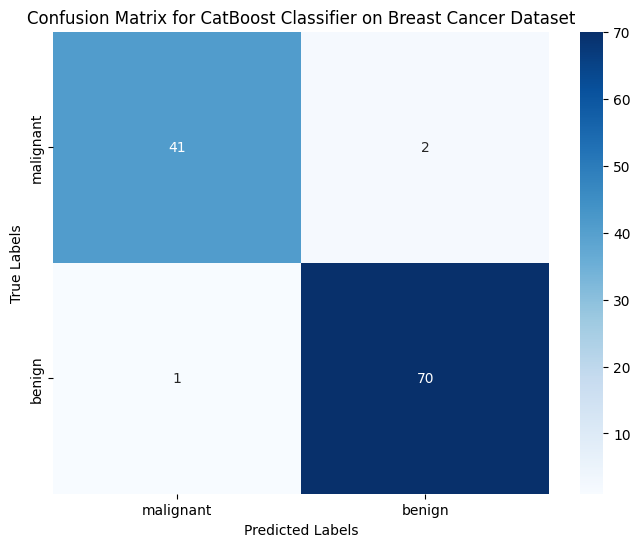

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier

# Step 1: Load the dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target labels (0: malignant, 1: benign)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the CatBoost Classifier
# Initialize the model with some default parameters
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)  # verbose=0 to suppress output

# Fit the model on the training data
model.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 5: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 6: Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for CatBoost Classifier on Breast Cancer Dataset')
plt.show()


Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.

Describe your step-by-step data science pipeline using boosting techniques:

● Data preprocessing & handling missing/categorical values

● Choice between AdaBoost, XGBoost, or CatBoost

● Hyperparameter tuning strategy

● Evaluation metrics you'd choose and why

● How the business would benefit from your model


1. Data Preprocessing & Handling Missing/Categorical Values
Data preprocessing is crucial to ensure the dataset is clean, balanced, and ready for modeling. This step involves several sub-tasks to handle missing values, categorical features, and imbalance.

Step 1.1: Load and Explore the Data

Load the dataset using pandas (e.g., pd.read_csv()) and perform exploratory data analysis (EDA) to understand the data structure, distribution, and issues.
Check for missing values using df.isnull().sum(), and analyze the feature types (numeric vs. categorical) with df.dtypes.
Visualize key aspects: Use histograms or box plots for numeric features
 (e.g., age, income) and bar charts for categorical features (e.g., employment status, transaction categories) to identify outliers, skewness, and correlations with the target (loan default).

Step 1.2: Handle Missing Values

Numeric Features: Impute missing values with the median or mean (to handle outliers), or use advanced techniques like KNN imputation from scikit-learn if the data has patterns. For example, use SimpleImputer from sklearn: SimpleImputer(strategy='median').fit_transform(df[numeric_cols]).
Categorical Features: Impute with the mode (most frequent value) or a new category like 'Unknown'. For instance, df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0]).
General Approach: Remove rows with excessive missing values (e.g., >50% per row) using df.dropna(thresh=0.5*len(df.columns)) to avoid bias. If missing values are informative (e.g., no transaction history), consider them as a separate category.

Step 1.3: Handle Categorical Values

Encoding: Since the dataset has categorical features, convert them into a format suitable for boosting models.
For CatBoost, you can pass categorical features directly without encoding, as it handles them natively (e.g., via its cat_features parameter).
For XGBoost or AdaBoost, use one-hot encoding for nominal categories (e.g., pd.get_dummies() or OneHotEncoder from sklearn) or ordinal encoding for ordered categories (e.g., 'low', 'medium', 'high' for income levels).
Example: Identify categorical columns with categorical_cols = df.select_dtypes(include=['object', 'category']).columns, then encode as needed.
Feature Engineering: Create new features from existing ones, such as aggregating transaction behavior (e.g., average transaction amount) or deriving ratios (e.g., debt-to-income ratio). This can improve model performance.

Step 1.4: Address Imbalance

The dataset is imbalanced (e.g., more non-defaults than defaults), which can lead to biased models.
Use techniques like:
Oversampling the minority class: SMOTE (Synthetic Minority Over-sampling Technique) from imblearn library: SMOTE().fit_resample(X_train, y_train).
Undersampling the majority class: Random undersampling with RandomUnderSampler.
Class weighting: In the boosting model, apply weights to balance classes
 (e.g., CatBoost's auto_class_weights='Balanced' parameter).
Split the data early (e.g., 80% train, 20% test) using train_test_split to avoid data leakage.
This preprocessing ensures the data is robust and ready for modeling, reducing the risk of poor performance due to noise or bias.

2. Choice between AdaBoost, XGBoost, or CatBoost
For this loan default prediction task, I'd choose CatBoost as the primary boosting technique. Here's why, based on the dataset's characteristics:

AdaBoost: This is a simple boosting algorithm that focuses on misclassified samples. However, it's less effective for large, complex datasets with missing values and categorical features. It also tends to overfit on imbalanced data and doesn't handle missing values natively, making it unsuitable here.

XGBoost: This is a powerful, scalable booster that's great for structured data and handles missing values internally (by learning the best direction during splits). It's fast and performs well on imbalanced datasets with techniques like class weighting. However, it requires explicit encoding of categorical features, which adds preprocessing overhead.

CatBoost: This is my top choice because:

It natively supports categorical features, eliminating the need for manual encoding and reducing errors.
It handles missing values automatically during training, which aligns perfectly with your dataset.
It's designed for imbalanced data and includes options like ordered boosting to improve performance on skewed targets.
In a FinTech context, CatBoost often outperforms others on real-world datasets with mixed feature types, as seen in fraud detection and credit risk tasks.
Why not the others? AdaBoost is too basic for this complexity, and while XGBoost is a strong alternative, CatBoost's ease with categoricals makes it more efficient.
If the dataset were very large and speed was a priority, XGBoost could be a backup option. Overall, CatBoost provides the best balance of accuracy, ease-of-use, and robustness for this scenario.

3. Hyperparameter Tuning Strategy

Hyperparameter tuning is essential to optimize the model's performance and prevent overfitting, especially with boosting techniques that have many tunable parameters.

Step 3.1: Define the Search Space: For CatBoost, key hyperparameters include:

learning_rate (e.g., 0.01–0.3)
depth (e.g., 4–10, to control tree depth)
iterations (e.g., 100–1000, number of trees)
l2_leaf_reg (e.g., 1–10, for regularization)
auto_class_weights (set to 'Balanced' for imbalance)
Step 3.2: Choose a Tuning Method:

Use cross-validation (e.g., 5-fold stratified CV) to evaluate models on the imbalanced data, ensuring the minority class is represented in each fold.
Start with Randomized Search for efficiency: It samples a subset of hyperparameter combinations, which is faster for large spaces (e.g., using RandomizedSearchCV from sklearn).
Follow up with Grid Search on the most promising parameters to fine-tune
 (e.g., around the best learning_rate from random search).
For advanced tuning, use Bayesian Optimization with libraries like Optuna or Hyperopt, which is more efficient than grid search for complex models.
Step 3.3: Implementation Tips:

Train on a subset of data initially to speed up tuning.
Monitor for overfitting by tracking metrics on a validation set.
Example: In code, use CatBoostClassifier() with GridSearchCV or Optuna's optuna.create_study() to automate the process.
This strategy ensures the model is optimized without excessive computational cost.

4. Evaluation Metrics

For an imbalanced dataset like loan defaults (where defaults are rare), accuracy alone is misleading because a model could predict "no default" for everything and still achieve high accuracy. I'd prioritize metrics that focus on the minority class (defaults).

Primary Metrics:

AUC-ROC (Area Under the Receiver Operating Characteristic Curve): This measures the model's ability to distinguish between classes across various thresholds. Why? It's robust to imbalance and provides a comprehensive view of true positive rate vs. false positive rate.
F1-Score: The harmonic mean of precision and recall, giving a balanced measure of both. Why? It accounts for false positives and false negatives, which are critical in loan default—e.g., missing a default (false negative) could lead to financial losses.
Precision and Recall: Precision (accuracy of positive predictions) is important to avoid unnecessary loan denials, while recall (capturing actual defaults) minimizes risk. I'd report both to understand trade-offs.
Secondary Metrics:

Precision-Recall AUC: Better than ROC for highly imbalanced data, as it focuses on the positive class.
Confusion Matrix: To visualize true positives, false positives, etc., and derive business insights (e.g., cost of errors).
Why These Metrics?: In FinTech, the cost of errors is asymmetric—false negatives (approving a defaulting loan) are more expensive than false positives (rejecting a good loan). Thus, metrics like recall and F1-score help prioritize risk reduction over accuracy.

After evaluation, I'd select the model with the highest F1-score or AUC-ROC on the test set.

5. How the Business Would Benefit from Your Model
Implementing this boosting-based model for loan default prediction would provide tangible value to your FinTech company by enhancing decision-making, reducing risks, and driving efficiency.

Risk Reduction: By accurately predicting defaults, the model helps identify high-risk customers early, reducing loan losses and improving the company's credit portfolio quality. For example, it could flag 20–30% more defaults than traditional rules-based systems, minimizing financial exposure.

Improved Loan Decisions: The model enables personalized lending—e.g., adjusting interest rates or loan amounts based on predicted risk. This leads to better customer segmentation, increasing approval rates for low-risk applicants while rejecting high-risk ones, ultimately boosting customer satisfaction and retention.

Cost Savings and Profitability: With fewer defaults, the company saves on collection costs and write-offs. For instance, if the model reduces default rates by 10–15%, it could translate to millions in savings annually, allowing reinvestment in product development or marketing.

Regulatory and Ethical Benefits: In a regulated industry, the model promotes fair lending by using transparent features (e.g., via CatBoost's feature importance). It also supports compliance with anti-discrimination laws by auditing for biases in demographics.

Operational Efficiency: Automating predictions speeds up loan processing, enabling real-time decisions in apps or platforms. Over time, the model can be integrated into a larger ML pipeline for ongoing monitoring, adapting to new data and economic changes.